In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import numpy as np

In [296]:
data = pd.read_csv('results_file_processed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name_x                190 non-null    object 
 1   profile_title         190 non-null    object 
 2   entreprise_name       190 non-null    object 
 3   nbr_employees         190 non-null    float64
 4   work_field            190 non-null    object 
 5   linkedin_url          190 non-null    object 
 6   reaction              190 non-null    object 
 7   region                190 non-null    object 
 8   current_job_duration  190 non-null    int64  
 9   total_experience      190 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 15.0+ KB


In [77]:
encoder_ = LabelEncoder()
for i in data:
    data[i]= encoder_.fit_transform(data[i])

In [297]:
data.head(10)

,name_x,profile_title,entreprise_name,nbr_employees,work_field,linkedin_url,reaction,region,current_job_duration,total_experience
0,Dellou Mohamed,Étudiant à Faculté des Sciences Economiques et...,Currently Unemployed,0.0,unemployed,https://www.linkedin.com/in/dellou-mohamed-677...,LIKE,Grand -Tunis,0,0
1,Zied MLIK,Supply Chain Manager,Délice Holding,137.0,Food Production,https://www.linkedin.com/in/zied-mlik-89117b20...,LIKE,Grand -Tunis,785,4376
2,kochtbene khaoula,I have a master in banking and international ...,ophtalmologist,0.0,unemployed,https://www.linkedin.com/in/kochtbene-khaoula?...,LIKE,Centre-Est,0,0
3,yesmine benrhaim,Étudiant(e) en 2MP ingénierie financière,Société jmal EJM,0.0,unemployed,https://www.linkedin.com/in/yesmine-benrhaim-2...,PRAISE,unknown,85,1059
4,Abdelkrim Essid,Agent comptable chez société les professionne...,société les professionnels des dattes,0.0,unemployed,https://www.linkedin.com/in/abdelkrim-essid-ba...,LIKE,Grand -Tunis,334,334
5,Aloui Sofiene,Directeur financier chez Hotel La Cigale Tabarka,Hotel La Cigale Tabarka,0.0,unemployed,https://www.linkedin.com/in/aloui-sofiene-a849...,LIKE,Grand -Tunis,5564,5564
6,najette boukholda,Étudiant à Faculté de science de monastir,Currently Unemployed,0.0,unemployed,https://www.linkedin.com/in/najette-boukholda-...,LIKE,Centre-Est,0,0
7,Achref MEDDEB,Supervisor at LOG SYSTEM,LOG SYSTEM,29.0,Computer Software,https://www.linkedin.com/in/achref-meddeb-905b...,LIKE,Grand -Tunis,694,2124
8,chahrazed ben farhat,Responsable de production chez DOUBLETRADE,DOUBLE TRADE INTESCIA GROUP,61.0,Information Technology & Services,https://www.linkedin.com/in/chahrazed-ben-farh...,LIKE,Grand -Tunis,1605,6354
9,Asma Hammami,Vendeur caissier chez polina,polina,0.0,unemployed,https://www.linkedin.com/in/asma-hammami-a5969...,LIKE,Grand -Tunis,0,0


In [145]:
data.isnull().sum()

name_x                  0
profile_title           0
entreprise_name         0
nbr_employees           0
work_field              0
linkedin_url            0
reaction                0
region                  0
current_job_duration    0
total_experience        0
dtype: int64

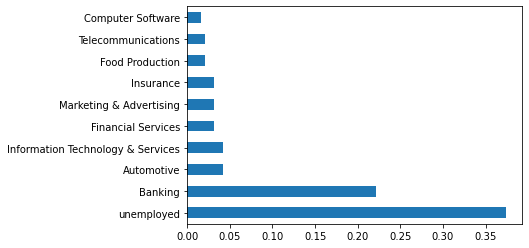

In [146]:
data["work_field"].value_counts(normalize=True)

#plot the bar graph of percentage job categories
data["work_field"].value_counts(normalize=True).nlargest(10).plot.barh()
plt.show()

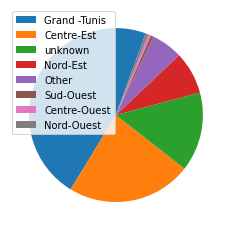

In [147]:
reg_data=data["region"].value_counts(normalize=True)
labels = ['Grand -Tunis', 'Centre-Est', 'unknown', 'Nord-Est', 'Other','Sud-Ouest', 'Centre-Ouest', 'Nord-Ouest']
patches, texts = plt.pie(reg_data, startangle=70)
plt.legend(patches, labels, loc="best")
#plot the pie chart of education categories
plt.show()

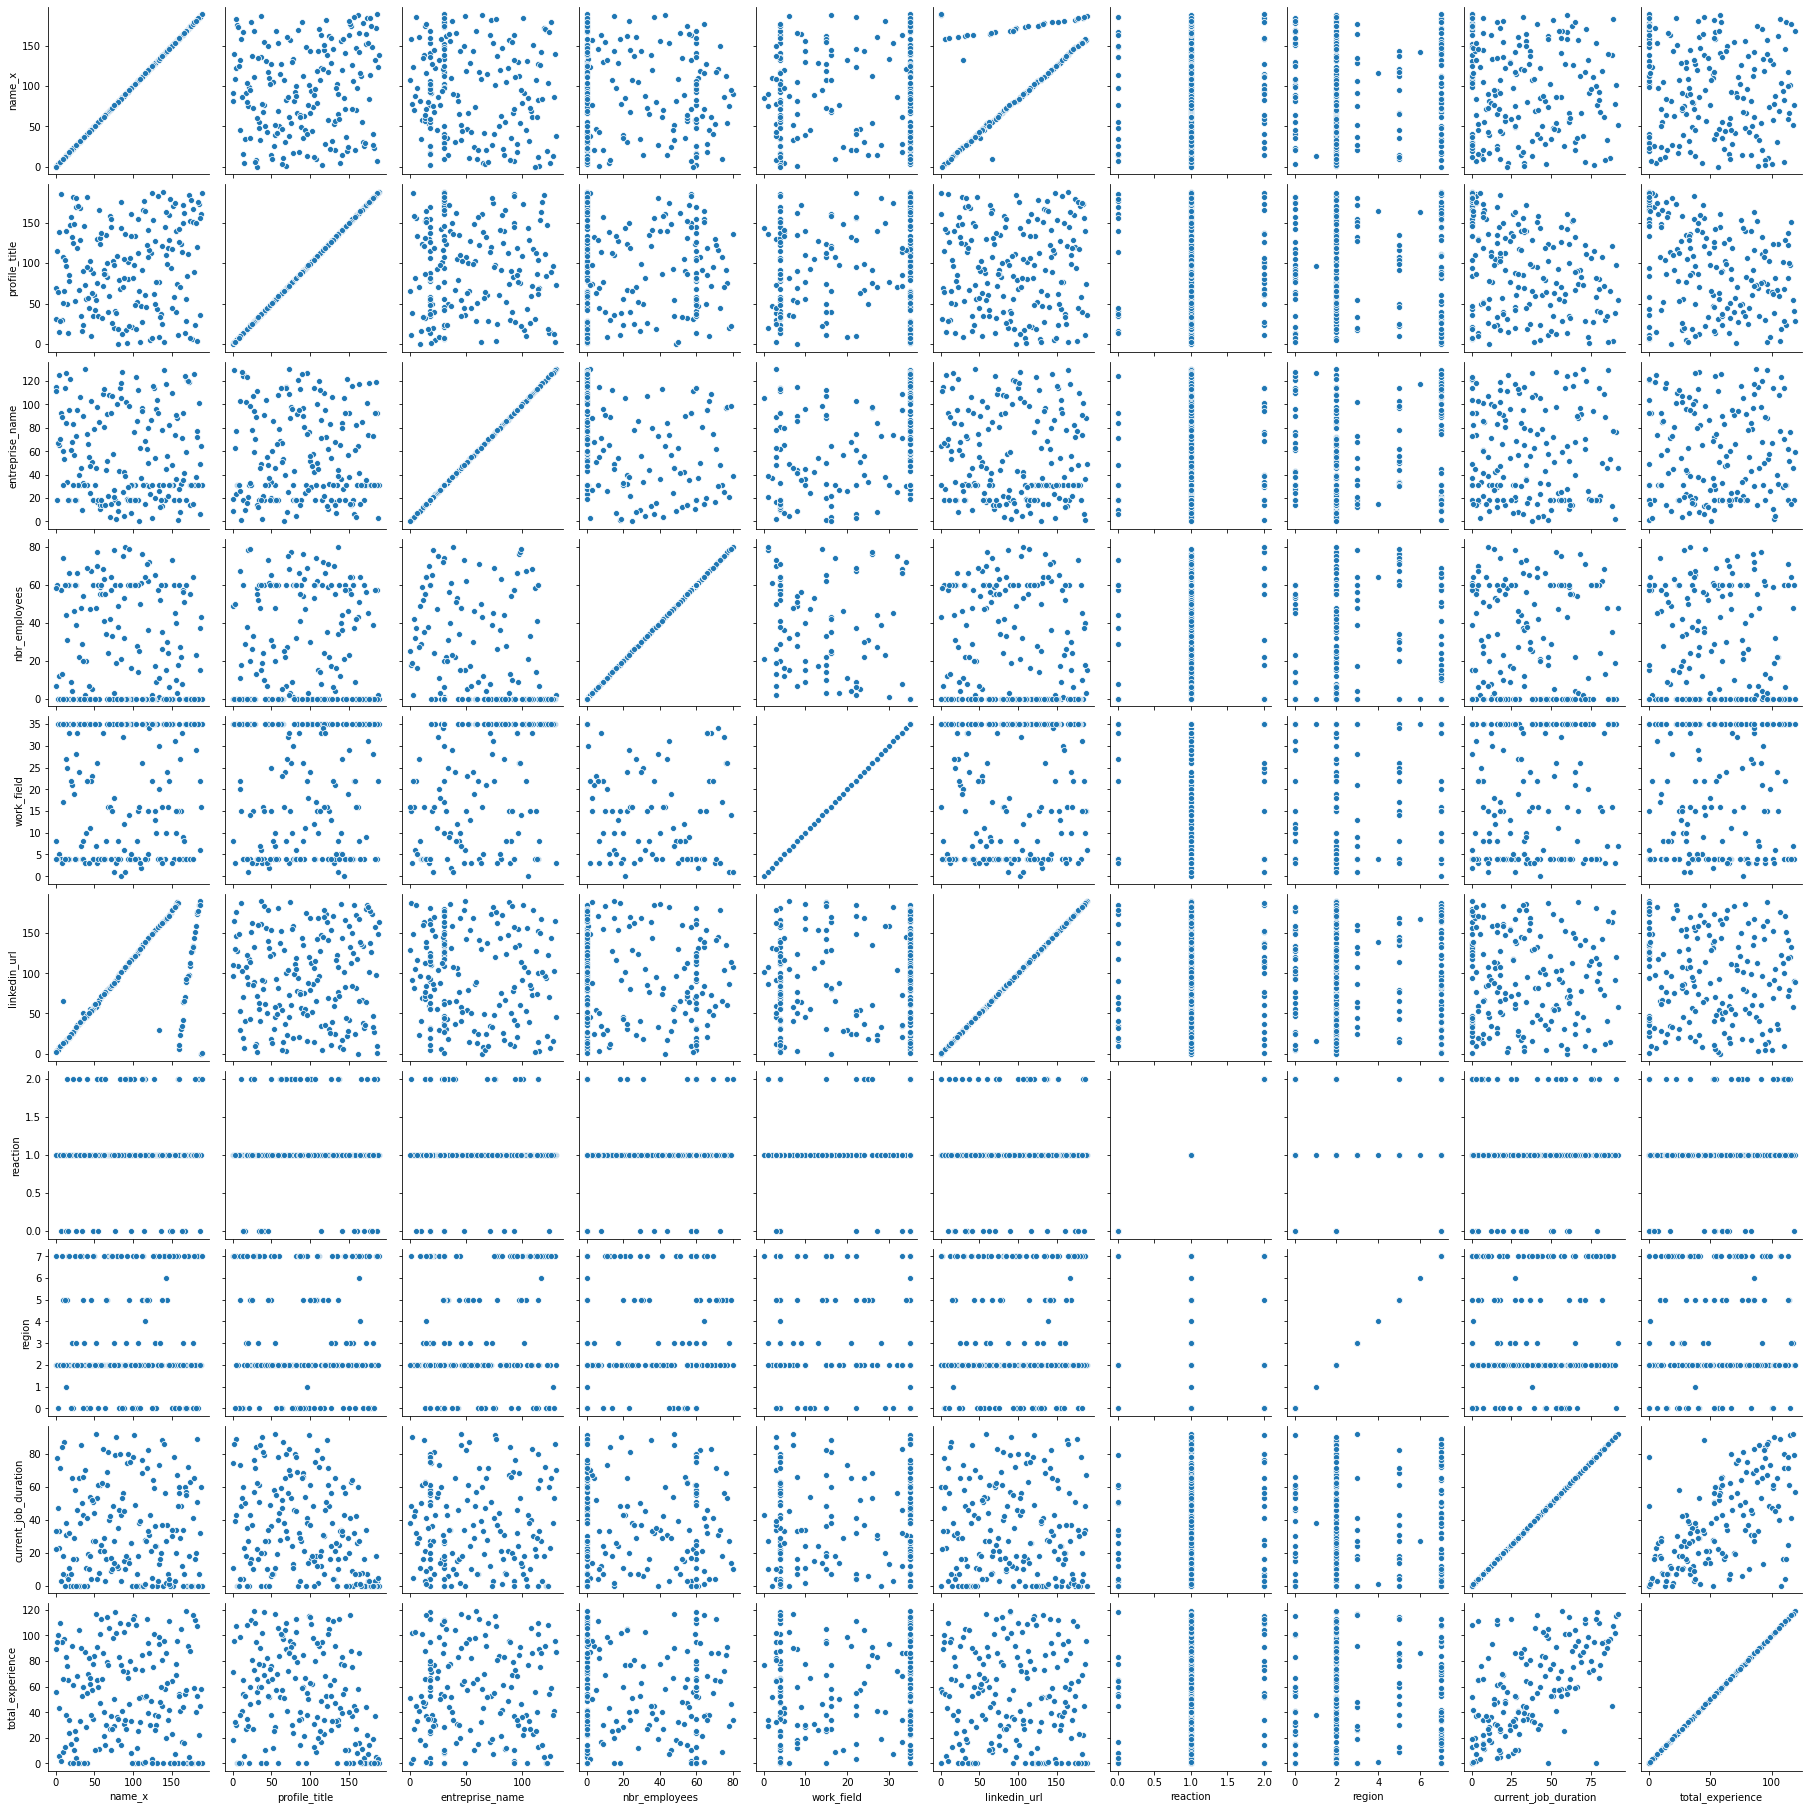

In [82]:
g = sns.PairGrid(data)
g.map(sns.scatterplot)

In [83]:
data.reaction.describe()

count    190.000000
mean       1.031579
std        0.447276
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: reaction, dtype: float64

In [84]:
data.reaction.value_counts()

1    152
2     22
0     16
Name: reaction, dtype: int64

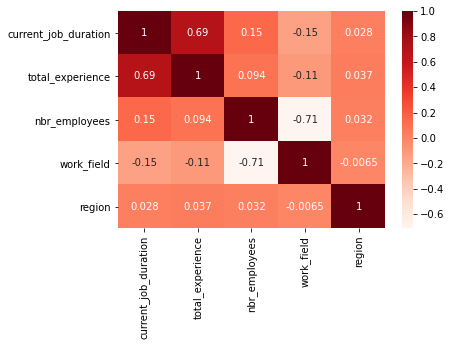

,current_job_duration,total_experience,nbr_employees,work_field,region
current_job_duration,1.000000,0.687759,0.146370,-0.145711,0.027714
total_experience,0.687759,1.000000,0.093641,-0.107062,0.037227
nbr_employees,0.146370,0.093641,1.000000,-0.711850,0.032403
work_field,-0.145711,-0.107062,-0.711850,1.000000,-0.006453
region,0.027714,0.037227,0.032403,-0.006453,1.000000


In [88]:
cor=data[['current_job_duration','total_experience','nbr_employees','work_field','region']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['current_job_duration','total_experience','nbr_employees','work_field','region']].corr(), annot=True, cmap = 'Reds')
plt.show()
cor

In [128]:
data = pd.read_csv('results_file_processed.csv')

In [97]:
#multivariate analysis
data.groupby('reaction')['total_experience'].mean()

reaction
EMPATHY    2769.937500
LIKE       2854.171053
PRAISE     3942.409091
Name: total_experience, dtype: float64

In [98]:
data.groupby('reaction')['total_experience'].median()

reaction
EMPATHY    2747.0
LIKE       2231.0
PRAISE     3862.5
Name: total_experience, dtype: float64

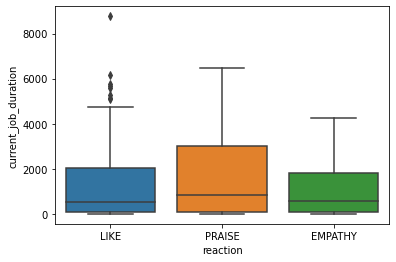

In [99]:
sns.boxplot(data.reaction, data.current_job_duration)
plt.show()


In [100]:
data.groupby("reaction").mean()

,nbr_employees,current_job_duration,total_experience
reaction,,,
EMPATHY,2891.500000,1048.500000,2769.937500
LIKE,5256.671053,1312.230263,2854.171053
PRAISE,21545.136364,1703.136364,3942.409091


In [101]:
counts = pd.crosstab(data.work_field,data.reaction)
counts.head(5)
drop_l = []
for i in list(counts.index):
    if sum(list(counts.loc[i,:])) < 2 :
        drop_l.append(i)
counts = counts.drop(drop_l)
counts.head(5)

reaction,EMPATHY,LIKE,PRAISE
work_field,,,
Accounting,0,1,1
Automotive,1,7,0
Banking,8,28,6
Computer Software,0,3,0
Cosmetics,0,2,0


In [230]:
drop_l

['260 followers',
 'Apparel & Fashion',
 'Food & Beverages',
 'Health, Wellness & Fitness',
 'Higher Education',
 'Hospitality',
 'Industrial Automation',
 'Internet',
 'Investment Banking',
 'La Bardo, Tunis',
 'Leisure, Travel & Tourism',
 'Management Consulting',
 'Mechanical Or Industrial Engineering',
 'NANTERRE',
 'Pharmaceuticals',
 'Professional Training & Coaching',
 'Real Estate',
 'Retail',
 'Supermarkets',
 'sydney, nsw']

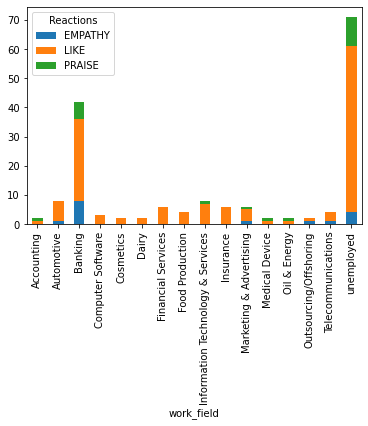

In [102]:
counts.plot.bar(stacked=True)
plt.legend(title='Reactions')
plt.show()

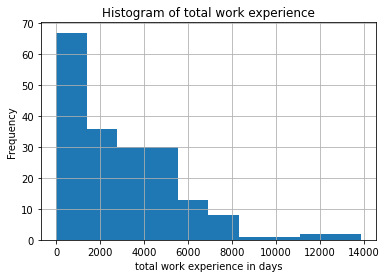

In [104]:
data.total_experience.hist()
plt.title('Histogram of total work experience')
plt.xlabel('total work experience in days')
plt.ylabel('Frequency')
plt.savefig('hist_age')

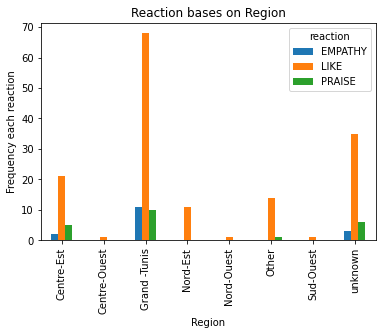

In [105]:
pd.crosstab(data.region,data.reaction).plot(kind='bar')
plt.title('Reaction bases on Region')
plt.xlabel('Region')
plt.ylabel('Frequency each reaction')
plt.savefig('pur_fre_pout_bar')

In [148]:
cat_vars=[ 'work_field', 'region']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['work_field', 'region','name_x', 'profile_title', 'entreprise_name','linkedin_url',]
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [149]:
data_final=data[to_keep]
data_final.columns

Index(['nbr_employees', 'reaction', 'current_job_duration', 'total_experience',
       'work_field_260 followers', 'work_field_Accounting',
       'work_field_Apparel & Fashion', 'work_field_Automotive',
       'work_field_Banking', 'work_field_Computer Software',
       'work_field_Cosmetics', 'work_field_Dairy',
       'work_field_Financial Services', 'work_field_Food & Beverages',
       'work_field_Food Production', 'work_field_Health, Wellness & Fitness',
       'work_field_Higher Education', 'work_field_Hospitality',
       'work_field_Industrial Automation',
       'work_field_Information Technology & Services', 'work_field_Insurance',
       'work_field_Internet', 'work_field_Investment Banking',
       'work_field_La Bardo, Tunis', 'work_field_Leisure, Travel & Tourism',
       'work_field_Management Consulting',
       'work_field_Marketing & Advertising',
       'work_field_Mechanical Or Industrial Engineering',
       'work_field_Medical Device', 'work_field_NANTERRE',
    

In [237]:
ld = []
lf = []
for i in list(data_final.columns):
    if i[0:5] == 'work_':
        ld.append(i)
for i in ld:
    if i[11:] in drop_l:
        lf.append(i)

In [277]:
#data_final = data_final.drop(lf,axis=1)
encoder_ = LabelEncoder()
for i in data_final:
    data_final[i]= encoder_.fit_transform(data_final[i])

In [298]:
#smote
X = data_final.loc[:, data_final.columns != 'reaction']
y = data_final.loc[:, data_final.columns == 'reaction']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=,columns=['reaction'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of PRAISE reactions",len(os_data_y[os_data_y['reaction']=="PRAISE"]))
print("Number of LIKE reactions",len(os_data_y[os_data_y['reaction']=="LIKE"]))
print("Number of EMPATHY reactions",len(os_data_y[os_data_y['reaction']=="EMPATHY"]))
print("Proportion of PRAISE data in oversampled data is ",len(os_data_y[os_data_y['reaction']=="PRAISE"])/len(os_data_X))
print("Proportion of LIKE data in oversampled data is ",len(os_data_y[os_data_y['reaction']=="LIKE"])/len(os_data_X))
print("Proportion of EMPATHY data in oversampled data is ",len(os_data_y[os_data_y['reaction']=="EMPATHY"])/len(os_data_X))

length of oversampled data is  366
Number of PRAISE reactions 0
Number of LIKE reactions 0
Number of EMPATHY reactions 0
Proportion of PRAISE data in oversampled data is  0.0
Proportion of LIKE data in oversampled data is  0.0
Proportion of EMPATHY data in oversampled data is  0.0


C:\Users\fedir\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [300]:
os_data_y["reaction"].value_counts()

2    122
1    122
0    122
Name: reaction, dtype: int64

In [280]:
X = data_final.loc[:, data_final.columns != 'reaction']
y = data_final.loc[:, data_final.columns == 'reaction']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [282]:
#LOGISTIC REGRESSION

In [283]:
data_final_vars=data_final.columns.values.tolist()
y=['reaction']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="newton-cg",max_iter=1000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\fedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False False False False  True False  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True]
[8 6 7 2 1 4 1 1 1 1 1 1 1 1 5 3 1 1 1 1 1 1 1 1 1 1 1]


In [284]:
from sklearn.metrics import accuracy_score
y_predRFE=rfe.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predRFE))

Accuracy: 0.6458333333333334


              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.86      0.79      0.82        38
           2       0.00      0.00      0.00         6

    accuracy                           0.65        48
   macro avg       0.32      0.35      0.32        48
weighted avg       0.69      0.65      0.66        48



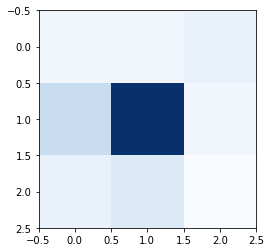

In [292]:
labels = [0, 1, 2]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRFE, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_predRFE, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)
logreg

C:\Users\fedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\fedir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [289]:
from sklearn.metrics import accuracy_score
y_predlogreg=logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predlogreg))

Accuracy: 0.4791666666666667


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.85      0.58      0.69        38
           2       0.12      0.17      0.14         6

    accuracy                           0.48        48
   macro avg       0.32      0.25      0.28        48
weighted avg       0.69      0.48      0.56        48



C:\Users\fedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


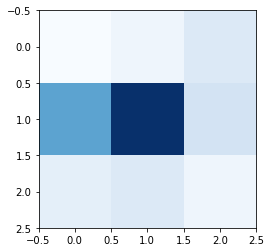

In [291]:
labels = [0, 1, 2] 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predlogreg, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_predlogreg, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color

## Random Forest

In [293]:
RFmodel = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
RFmodel.fit(os_data_X, os_data_y)

<ipython-input-293-14fe4d59edf8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFmodel.fit(os_data_X, os_data_y)


RandomForestClassifier(max_features='sqrt')

In [294]:
from sklearn.metrics import accuracy_score
y_predRF=RFmodel.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predRF))

Accuracy: 0.6458333333333334


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      0.74      0.77        38
           2       0.43      0.50      0.46         6

    accuracy                           0.65        48
   macro avg       0.41      0.41      0.41        48
weighted avg       0.69      0.65      0.66        48



C:\Users\fedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


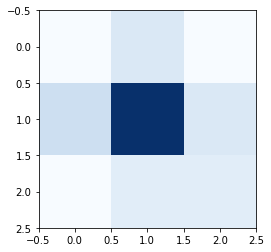

In [295]:
labels = [0, 1, 2]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRF, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_predRF, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color

## Random Forest Hyperparameter Tuning

In [172]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [174]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished
C:\Users\fedir\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [175]:
from sklearn.metrics import accuracy_score
y_predRF=RFmodel.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predRF))

Accuracy: 0.7719298245614035


              precision    recall  f1-score   support

      PRAISE       0.00      0.00      0.00         8
        LIKE       0.79      0.98      0.87        45
     EMPATHY       0.00      0.00      0.00         4

    accuracy                           0.77        57
   macro avg       0.26      0.33      0.29        57
weighted avg       0.62      0.77      0.69        57



C:\Users\fedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['PRAISE', 'LIKE', 'EMPATHY'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\fedir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


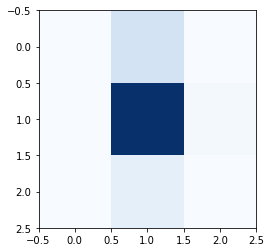

In [176]:
labels = ['PRAISE', 'LIKE', 'EMPATHY'] 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRF, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_predRF, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color